In [1]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# load user written modules
import tools
import model
import vfi
import egm

## Model description

The simple specification of our model in discrete time is given by the recursive problem
\begin{equation}
	\begin{aligned}
		v(a_t)  &=  \max_{c}  u(c_t) + \beta \mathrm{E}_t \big[ v(a_{t+1})\big] \\
		& \text{s.t.} \\	
		a_{t+1} &= y_{t+1} + (1+r)(a_t - c_t). \\
        a_t & \geq 0
	\end{aligned}
\end{equation}
where
\begin{equation}
y_t = \begin{cases}
y_1 \quad \text{w. prob.} \quad \pi \\
y_2 \quad \text{w. prob.} \quad 1-\pi
\end{cases}
\end{equation}

and instantaneous utility is given by
\begin{equation}
u(c_t) = \begin{cases}
\frac{c^{1-\eta} - 1}{1-\eta} \quad & \text{for} \quad \eta \neq 1 \\
\log c_t \quad & \text{for} \quad \eta = 1 
\end{cases}
\end{equation}

First we setup all parameters used in the solution algortihms

In [2]:
par = model.setup()

## Solve by value function iteration (VFI)

We can then solve the model using value function iteration. Write a bit about the algorithm here.

In [3]:
sol_vfi = vfi.solve_VFI(par)

Check how many iterations are used to find the convergent solution

In [4]:
print("Using value function iteration required " + str(sol_vfi.it) +" iterations before convergence")

Using value function iteration required 267 iterations before convergence


## Solve by the endogenous grid method (EGM)

It seems that to solve the model using the endogenous grid methods, we again rely on the contraction mapping theorem. Hence, the only difference from VFI is that we update each iteration more efficiently.

The idea of EGM is to use the Euler equation to solve the problem:
\begin{equation}
c_t^{-\rho} = (1+r)\beta \mathrm{E}_t \Big[ \big(c_{t+1}(a_{t+1})\big)^{-\rho} \Big] = (1+r)\beta  \mathrm{E}_t \Big[ \big(c_{t+1}\big((1+r)a_t-c_t\big) \big)^{-\rho} \Big]
\end{equation}
In the RHS i've inserted the transition rule for assets. Note that in our model assets are the same as the state

Run the EGM algortihm

In [5]:
sol_egm = egm.solve_EGM(par)

Again, we check the number of iterations used

In [6]:
print("Using value function iteration required " + str(sol_egm.it) +" iterations before convergence")

Using value function iteration required 56 iterations before convergence


Besides using considerably less iterations, we also note that each iteration should be much quicker for EGM as we can back out optimal consumption given last iteration WITHOUT ousing any solver

To assert that our algorithms have run correctly, we can compare the converged policy functions derived from each algorithm

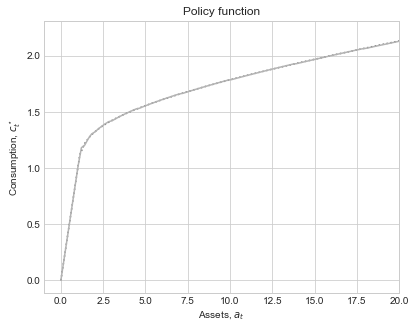

In [7]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)

ax.plot(sol_egm.a, sol_egm.c, linestyle = ':', color = '0.4')
ax.plot(sol_vfi.a, sol_vfi.c, linestyle = '-', color = '0.7')
ax.set_xlabel(f"Assets, $a_t$")
ax.set_ylabel(f"Consumption, $c^\star_t$")
ax.set_title(f'Policy function')
ax.set_xlim([-1,20])

plt.show()

We can see that the two solutions are quite close.

We now extend the EGM algortihm to solve a general Markov process for wages. The model is therefore
\begin{equation}
	\begin{aligned}
		v_j(a_t)  &=  \max_{c}  u(c_t) + \beta \Big[ P_{jj} v_j(a_{t+1}) + (1-P_{jj})v_{-j}(a_{t+1}) \big] \\
		& \text{s.t.} \\	
		a_{t+1} &= y_j + (1+r)(a_t - c_t). \\
        a_t & \geq 0
	\end{aligned}
\end{equation}
for $j \in \{1,2\}$. 

We have the transition matrix between states
\begin{equation}
\mathbf{P} = \begin{pmatrix}
P_{11} & 1 - P_{11} \\
1 - P_{22} & P_{22}
\end{pmatrix}
\end{equation}
where $P_{11}$ is the probability of of staying in state 1 conditional on being in state 1 and $P_{22}$ is the probability of staying in state 2 conditional on being in state 2.
\end{equation}

**Run the new and improved EGM solver**

In [31]:
sol_egm_2d = egm.solve_EGM_2d(par)

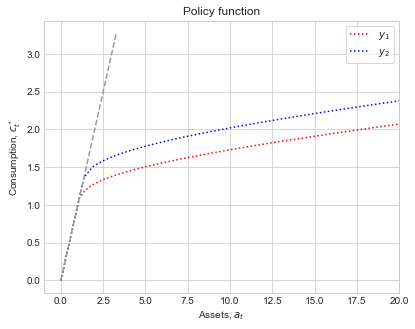

In [26]:
fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)

ax.plot(sol_egm_2d.a[0,:], sol_egm_2d.c[0,:], linestyle = ':', color = 'red', label = '$y_1$')
ax.plot(sol_egm_2d.a[1,:], sol_egm_2d.c[1,:], linestyle = ':', color = 'blue', label = '$y_2$')
ax.plot(sol_egm_2d.a[1,:10], sol_egm_2d.a[1,:10], linestyle = '--', color = '0.6') # Check with 45 degree line. Seems correct
ax.set_xlabel(f"Assets, $a_t$")
ax.set_ylabel(f"Consumption, $c^\star_t$")
ax.set_title(f'Policy function')
ax.set_xlim([-1,20])
ax.legend(frameon=True)

plt.show()

In [27]:
print("We again used " + str(sol_egm_2d.it) +" iterations before convergence")

We again used 56 iterations before convergence
